<small>Mentoría de la Diplomatura en Ciencia de Datos y sus Aplicaciones - FaMAF UNC 2022.</small>
# Detección de anomalías en despachos de combustible

## Práctico de Análisis y Visualización de Datos

**Mentora:** Daniela Bosch

**Integrantes:**

### Introducción

En este trabajo buscamos obtener una primera aproximación a los resultados observando la distribución de las variables e identificando los outliers.

Los datos con la descripción de cada una de sus columnas puede encontrarse en el siguiente link: https://www.kaggle.com/datasets/danielabosch/fuel-transactions-from-gas-pump

#### Objetivos del práctico

- Conocer el dataset y familiarizarse con series temporales.
- Observar comportamientos similares entre series.
- Analizar visualmente outliers observando las distribuciones.

### Lectura del dataset

Importamos las librerías necesarias y leemos el dataset.


About this file
El conjunto pertenece a datos registrados por nodos IoT durante los mes de enero a marzo 2022.

Se trata de una serie temporal y contiene en general la siguiente información:

-Nro de la transacción.

-Fecha y hora de inicio y de fin de la transacción.

-Cantidad de litros de combustible despachado.

-Volumen real registrado por otros nodos IoT en los tanques durante el inicio y fin de la descarga.

-Estación, sutidor, empresa de origen.

-Tipo de combustible transaccionado.

-Geolocalización (si es soportada).

-Unidad de consumo de destino.

-Sector de la industria a la que pertenece la estación.

Desde la serie más atómica a la agrupación más general, el orden es el siguiente:
id_bomba --> id_equipo --> id_empresa --> id_industria

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
sns.set_context('talk')

In [2]:
import io
pd.set_option('display.max_rows', 4)

In [3]:
# Script para habilitar el ingreso a una BD local de Google Drive

import io
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

def connect_to_drive():
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    return GoogleDrive(gauth)

def read_pkl_from_drive(drive, id, filename):
    downloaded = drive.CreateFile({'id':id}) 
    downloaded.GetContentFile(filename)  
    return pd.read_pickle(filename)

def read_csv_from_drive(drive, id, filename):
    downloaded = drive.CreateFile({'id':id}) 
    downloaded.GetContentFile(filename)  
    return pd.read_csv(
        filename, 
        parse_dates = ["timestamp", "timestamp_stop"],
        dtype = {"departamento" : str}
    )

drive = connect_to_drive()

filename = '1Z6q3ZCzG2j-zhKh2n1xmBL-FoQjzd1KJ'
df = read_csv_from_drive(
    drive, 
    filename, 
    'transacciones_surtidor.csv'
)
df.head(10)

,unique_id_transa,id_transaccion,id_vehiculo,id_usuario,id_equipo,veh_site_id,pump_site_id,tank_site_id,user_site_id,producto,...,temp_final,volumen_comp_15_inicial,volumen_comp_15_final,cantidad_comp_15,codigo_producto,geo_latitud,geo_longitud,id_empresa,id_industria,industria
0,377220101009999,9999,90952,12708,377,000001,1,1,0000,0.0,...,NaN,NaN,NaN,0.000,NaN,NaN,NaN,238,1.0,Transportation
1,504220101006768,6768,101866,6683,504,000001,1,1,0000,0.0,...,NaN,NaN,NaN,158.416,Product 1,NaN,NaN,25,5.0,Distributor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,1042220101000129,129,1000827,58310,1042,AAA500,1,1,0000,1.0,...,24.0,41084.1,40867.6,227.935,NaN,NaN,NaN,180,4.0,Agriculture
9,454220101000604,604,58754,5893,454,000003,1,1,0000,0.0,...,NaN,NaN,NaN,109.143,Product 1,NaN,NaN,118,6.0,Service Station


In [4]:
#####Para Colab ########
#from google.colab import files
#uploaded = files.upload()

In [5]:
#file_key = 'transacciones_surtidor.csv'  # Replace for correspoing key
#df = pd.read_csv(io.StringIO(uploaded[file_key].decode('utf-8')))

In [6]:
#Se definen los estilos de gráficos

#Se define el uso de paleta de verdes y rosas
PiYG_r = sns.color_palette("PiYG_r", 10)
sns.set_palette(PiYG_r)


#Se define que el fondo de los graficos va a ser blanco y que se va a mostrar la grilla
sns.set_style("whitegrid")

#Se define que solo se quiere mostrar las lineas de los ejes de la izquierda y abajo
sns.despine(left=True, bottom=True)

#Se define el tamaño de los graficos, de la fuente y de los renglones
sns.set_context("talk", font_scale = .5, rc={"grid.linewidth": 0.6})

<Figure size 432x288 with 0 Axes>

Se puede observar que las series se encuentran mezcladas en el mismo dataset. Para realizar algunos análisis más interesantes se debe agrupar o usar pivotes.

In [7]:
df.groupby("id_bomba")["cantidad"].describe()

,count,mean,std,min,25%,50%,75%,max
id_bomba,,,,,,,,
0,18.0,0.043667,0.102923,0.000,0.00000,0.0005,0.00175,0.320
62,1184.0,125.802258,91.177540,0.000,100.00000,100.0000,172.66025,633.995
...,...,...,...,...,...,...,...,...
103098,18.0,18.150222,6.892481,0.005,20.11125,20.1835,21.13100,26.200
103099,4.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000


In [8]:
df.shape

(561747, 32)

### CONSIGNAS
________________________________________________________________________________

Se proponen dos actividades de base y una actividad opcional referida al análisis de series temporales. Realizar una breve conclusión sobre los resultados obtenidos.

#### 1. Análisis descriptivo

- Seleccionar las columnas de interés a analizar.
- Realizar un análisis descriptivo sobre el conjunto completo y sobre algunos agrupadores (industria, empresa, etc). **¿Qué diferencias se pueden ver entre los estadísticos de las agrupaciones?** (Ej. la industria minería tiene un consumo medio por transacción mayor a la industria de transporte).
- Seleccionar una o dos industrias. Realizar un análisis descriptivo ahora teniendo en cuenta periodos de tiempo (día de la semana, semana, día del mes, etc). **¿Se observan comportamientos distintos según el periodo de tiempo?**



> _Se debe convertir el timestamp a índice para ciertos análisis. Además deben estar ordenados._



In [9]:
df.set_index("timestamp", inplace=True)
df = df.sort_index()

In [10]:
# Agrupación por periodo
df.groupby(pd.Grouper(freq='1D'))["cantidad"].mean().head()

timestamp
2022-01-01    141.718385
2022-01-02    343.116945
                 ...    
2022-01-04    228.681796
2022-01-05    237.879609
Freq: D, Name: cantidad, Length: 5, dtype: float64

#### 2. Visualización de outliers

- Seleccionar las variables de interés.
- Graficar las distribuciones de estas variables para todo el conjunto y destacar sus outliers. Utilizar boxplots, boxenplots o visualizaciones que crean convenientes.
- Graficar las distribuciones ahora agrupando por cualidades en común entre las series (ej. por industria). **¿Ciertas transacciones podrían considerarse anómalas en una [industria] mientras que en otra no?**
- Comparar outliers visualizados entre ambos gráficos **¿Qué anomalías se detectaron en una visualización mientras que en la otra no?**

#### (Opcional) 3. Descomposición de series temporales

El análisis de los componentes de una serie temporal nos puede ayudar más adelante para detectar anomalías relacionadas a su comportamiento estacionario. Una de las librerías recomentadas para la descomposición es `statsmodels`. En este ejercicio se requiere:

- Elegir dos estaciones de un sector de la industria y dos estaciones de otra industria, y graficar sus descomposiciones (estacionalidad, tendencia, residuo). Elegir correctamente el periodo para cada una.
- ¿Las series son estacionarias? Analizar gráficamente.
- Observar las estacionalidades y las tendencias de las series. **¿Se pueden ver comportamientos similares entre estaciones de la misma industria? ¿Y entre industrias?**
- Observar los residuos de las series **¿Se pueden detectar a simple vista algunos outliers?** Comentar.





> _Verificar que la versión de statsmodels sea la última versión estable (0.13.2) ya que cambian varios métodos. Google Colab utiliza por defecto la versión 0.10.2._



In [11]:
# !pip install statsmodels==0.13.2
# import statsmodels
# statsmodels.__version__

Se deja a modo de ejemplo, la descomposición de la serie de una estación.

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
# Seleccionamos una estación
station = 504

In [14]:
# Convertir el timestamp a índice en el caso de no haberse realizado 
# anteriormente
# ts_station_504 = df.query("id_equipo == @station").set_index("timestamp")
#ts_station_504 = df.query("id_equipo == @station")
#res = seasonal_decompose(ts_station_504["cantidad"], period=24, model="aditive")

#fig = res.plot()

### ENTREGABLE
_______________________________________________________________________________

Se propone la elaboración de un informe que deberá entregarse en formato de notebook tipo Jupyter o Google Colaboratory, con los resultados guardados, gráficos, notas y conclusiones. El mismo deberá apuntar a un público técnico, pero sin conocimientos específicos en el tema.

**Fecha de entrega: 20/05/2022**

### Enlaces útiles
- https://www.kaggle.com/code/jagangupta/time-series-basics-exploring-traditional-ts/notebook
- https://www.kaggle.com/code/bextuychiev/every-pandas-function-to-manipulate-time-series/notebook
- https://towardsdatascience.com/advanced-time-series-analysis-in-python-decomposition-autocorrelation-115aa64f475e
- https://neptune.ai/blog/anomaly-detection-in-time-series

# 1. Análisis Descriptivo
________________________________________________________________________________


## 1.1. **Se seleccionan columnas de interés y se calculan parámetros que ayudan a conocer el df**


In [15]:
#Columnas de interes
interes_columns = ["nombre_prod", "cantidad", "cantidad_comp_15", "codigo_error","timestamp_stop",
               "volumen_comp_15_inicial", "volumen_comp_15_final","temp_inicial","temp_final",
               "id_empresa","industria"]

In [16]:
#Cantidad de filas y columnas del df

df.shape

(561747, 31)

In [17]:
#Tipo de datos en las columnas
pd.set_option('display.max_rows', 31)
df.dtypes

unique_id_transa                    int64
id_transaccion                      int64
id_vehiculo                         int64
id_usuario                          int64
id_equipo                           int64
veh_site_id                        object
pump_site_id                        int64
tank_site_id                        int64
user_site_id                       object
producto                          float64
id_bomba                            int64
id_tanque                           int64
departamento                       object
cantidad                          float64
codigo_error                       object
timestamp_stop             datetime64[ns]
nombre_prod                        object
veh_efficiency                    float64
volumen_inicial                   float64
volumen_final                     float64
temp_inicial                      float64
temp_final                        float64
volumen_comp_15_inicial           float64
volumen_comp_15_final             

In [18]:
#Para poder observar los datos float con 2 decimales
pd.options.display.float_format = '{:.2f}'.format

In [19]:
#Unas de las variables más relevantes a utilizar para el análisis serán "cantidad" y posiblemente "nombre_prod"

df['cantidad'].describe()

count   561747.00
mean       249.66
std       1700.40
min     -29616.00
25%         23.49
50%         60.89
75%        143.51
max     100000.00
Name: cantidad, dtype: float64

In [20]:
pd.set_option('display.max_rows', None)
df['nombre_prod'].value_counts()

Diesel 500                   84113
Producto 0                   76778
Product 1                    68359
Nafta Super                  38840
Super                        28458
Gas Oil                      22852
Producto 1                   21734
Infinia Diesel               20491
Diesel                       20084
DIESEL                       15577
Diesel Grado 2               11691
Product 2                    11403
Ultra Diesel                  9376
V-Power Nafta                 8674
Gasoil                        8259
VP Nafta                      6952
Formula Diesel                6404
GASOIL                        6149
VP Diesel                     5897
VP-Diesel                     4724
Diesel 500 PPM                4625
Gasoil GOM G3                 4614
Product 3                     3811
Gas Oil Comun Gr 2            3623
Nafta                         3277
Producto 2                    3051
V-Power Diesel                3002
Gas Oil Euro Gr 3             2977
Gasoil GOM G3 Diesel

In [21]:
#Cantidad de tipos de productos

df['nombre_prod'].nunique()

102

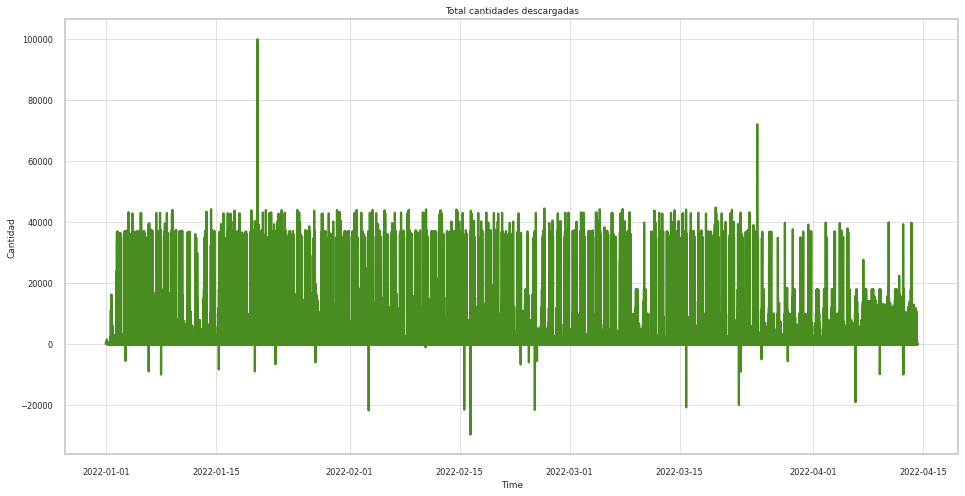

In [22]:
#Se analiza gráficamente la dispersión del campo "cantidad"

ts=df.groupby(["timestamp"])["cantidad"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total cantidades descargadas')
plt.xlabel('Time')
plt.ylabel('Cantidad')
plt.plot(ts);

####**>> CONCLUSIONES**

---
Analizando el dataframe en su totalidad se puede observar que:

- El campo `'cantidad'` asume valores que van desde **-29616.00** a **100000.00**, sin embargo las transacciones concentran valores entre 0 y 40000 litros (Aproximadamente). Es por ello que podrían adoptarse los siguientes criterios de limpieza de datos:

    - Las transacciones con `'cantidad'`< 0 deberían ser apartadas para otro análisis
    - Las Transacciones con `'cantidad'`< PESO MÁXIMO TRANSPORTABLE. Se adopta, por simplificación, que el PESO MÁXIMO TRANSPORTABLE debería ser = 45000 kg x 0,845 kg/L = 50000 L (Aproximadamente)
    - Las transacciones con `'cantidad'`= 0 deberían ser apartadas para otro análisis

- El campo `'nombre_producto'` asume distintos valores según el adoptado por la industria/empresa por ello debiera trabajarse mejor en la unificación de esta variable para poder emplearlo como segmentador


Por las conclusiones enumeradas se decide realizar el análisis con dos dataframes:

- `df` = dataframe que contiene todos los outliers
- `df_cleaned` = dataframe que contiene todas las transacciones:
    - *donde se cumpla*: **50000** **>**`'cantidad'` **> 0**

El `df_cleaned` nos permitirá mejorar el análisis comparativo entre segmentos. Los outliers que contempla el `df` no serán descartados, simplemente serán apartados para ciertos análisis por el momento.




In [23]:
#Se crea el df_cleaned

df_cleaned = df[(df['cantidad'] <= 50000) & (df['cantidad']>0)]


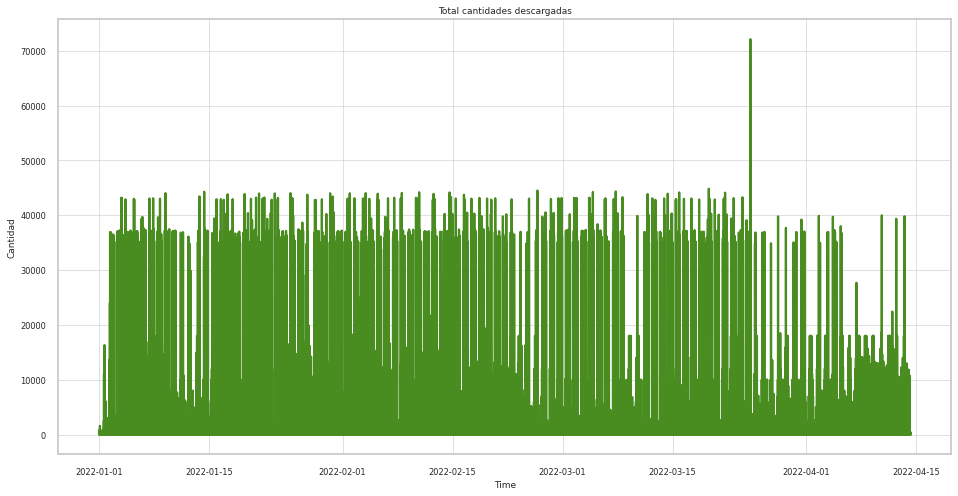

In [24]:
#Se analiza gráficamente la dispersión del campo "cantidad", ahora utilizando el df_cleaned

ts=df_cleaned.groupby(["timestamp"])["cantidad"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total cantidades descargadas')
plt.xlabel('Time')
plt.ylabel('Cantidad')
plt.plot(ts);

## 1.2. **Se realiza análisis descriptivo sobre el agrupador: industria**

In [25]:
#Se cuentan los valores por industria

pd.set_option('display.max_rows', None)
df['industria'].value_counts()

Transportation     203882
Service Station    168010
Agriculture         42387
Construction        32952
Mining              26305
Oil&Gas             19836
Industry            13180
Distributor          7601
Public               4220
Telcos                256
Name: industria, dtype: int64

In [26]:
#Se listan las industrias del df

import numpy as np

print(df['industria'].unique())

['Distributor' 'Agriculture' 'Oil&Gas' 'Transportation' 'Mining' nan
 'Service Station' 'Industry' 'Construction' 'Public' 'Telcos']


Del listado anterior se pueden identificar NaNs. Para tenerlo en cuenta en el análisis

In [27]:
print(df['id_industria'].unique())

[ 5.  4.  3.  1.  2. nan  6.  0.  9.  7.  8. 10.]


In [28]:
#Se analizan los consumos por industria con df

pd.set_option('display.max_rows', None)
df.groupby("industria")["cantidad"].describe().sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
industria,,,,,,,,
Telcos,256.00,8.08,6.92,0.00,0.00,11.16,13.41,40.33
Distributor,7601.00,92.28,191.25,-1021.20,12.01,54.94,126.24,3430.00
Service Station,168010.00,106.87,833.75,-9950.37,4.53,19.63,57.45,100000.00
Industry,13180.00,119.26,453.62,-29616.00,15.21,51.97,93.31,5000.43
Public,4220.00,124.73,220.54,0.00,40.00,60.04,150.04,4000.13
Transportation,203882.00,168.04,368.91,-21721.60,39.88,79.99,174.03,15256.10
Construction,32952.00,204.71,454.70,0.00,63.91,128.36,221.04,8706.87
Agriculture,42387.00,212.66,408.98,0.00,50.02,111.94,245.87,9929.61
Mining,26305.00,984.87,3194.33,0.00,56.80,155.22,288.91,39976.20


In [29]:
#Se crea un dataframe con las medias por industria a partir de "df"

transp = df[df["industria"]=="Transportation"]
mining = df[df["industria"]=="Mining"]
distributor = df[df["industria"]=="Distributor"]
agriculture = df[df["industria"]=="Agriculture"]
oilGas = df[df["industria"]=="Oil&Gas"]
nan = df[df["industria"]=="nan"]
service_station = df[df["industria"]=="Service Station"]
industry= df[df["industria"]=="Industry"]
const = df[df["industria"]=="Construction"]
public = df[df["industria"]=="Public"]
telcos = df[df["industria"]=="Telcos"]

#Se crean las variables "mean" a partir del "df" por cada industria

mean_transp = transp['cantidad'].mean()
mean_mining = mining['cantidad'].mean()
mean_distributor = distributor['cantidad'].mean()
mean_agriculture = agriculture['cantidad'].mean()
mean_oilGas = oilGas['cantidad'].mean()
mean_nan = nan['cantidad'].mean()
mean_service_station = service_station['cantidad'].mean()
mean_industry = industry['cantidad'].mean()
mean_const = const['cantidad'].mean()
mean_public = public['cantidad'].mean()
mean_telcos = telcos['cantidad'].mean()


#Se crea dataframe con las medias por industria empleando df

mean_industras_df = [mean_transp,mean_mining,mean_distributor,mean_agriculture,mean_oilGas,mean_nan,mean_service_station,mean_industry,mean_const,mean_public,mean_telcos]



In [30]:
#Se analizan los consumos por industria con df_cleaned

pd.set_option('display.max_rows', None)
df_cleaned.groupby("industria")["cantidad"].describe().sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
industria,,,,,,,,
Telcos,176.00,11.75,5.14,1.07,10.99,12.69,13.83,40.33
Service Station,160270.00,112.04,813.11,0.00,5.06,21.69,58.86,24931.80
Distributor,6206.00,113.47,204.97,0.00,30.00,83.71,131.53,3430.00
Industry,12883.00,125.85,354.90,0.00,16.30,53.24,96.77,5000.43
Public,4135.00,127.30,222.06,0.00,40.09,60.16,150.14,4000.13
Transportation,191966.00,179.65,345.90,0.00,45.55,85.79,190.55,15256.10
Construction,32565.00,207.14,456.84,0.00,65.20,130.22,222.43,8706.87
Agriculture,41338.00,218.06,412.71,0.00,52.13,118.09,250.10,9929.61
Mining,25287.00,1024.52,3251.76,0.01,60.19,169.20,298.01,39976.20


In [31]:
#Se crea un dataframe con las medias por industria a partir de "df_cleaned"

transp2 = df_cleaned[df_cleaned["industria"]=="Transportation"]
mining2 = df_cleaned[df_cleaned["industria"]=="Mining"]
distributor2 = df_cleaned[df_cleaned["industria"]=="Distributor"]
agriculture2 = df_cleaned[df_cleaned["industria"]=="Agriculture"]
oilGas2 = df_cleaned[df_cleaned["industria"]=="Oil&Gas"]
nan2 = df_cleaned[df_cleaned["industria"]=="nan"]
service_station2 = df_cleaned[df_cleaned["industria"]=="Service Station"]
industry2= df_cleaned[df_cleaned["industria"]=="Industry"]
const2 = df_cleaned[df_cleaned["industria"]=="Construction"]
public2 = df_cleaned[df_cleaned["industria"]=="Public"]
telcos2 = df_cleaned[df_cleaned["industria"]=="Telcos"]

#Se crean las variables "mean" a partir del "df" por cada industria

mean_transp2 = transp2['cantidad'].mean()
mean_mining2 = mining2['cantidad'].mean()
mean_distributor2 = distributor2['cantidad'].mean()
mean_agriculture2 = agriculture2['cantidad'].mean()
mean_oilGas2 = oilGas2['cantidad'].mean()
mean_nan2 = nan2['cantidad'].mean()
mean_service_station2 = service_station2['cantidad'].mean()
mean_industry2 = industry2['cantidad'].mean()
mean_const2 = const2['cantidad'].mean()
mean_public2 = public2['cantidad'].mean()
mean_telcos2 = telcos2['cantidad'].mean()


#Se crea dataframe con las medias por industria empleando df

mean_industras_df_cleaned = [mean_transp2,mean_mining2,mean_distributor2,mean_agriculture2,mean_oilGas2,mean_nan2,mean_service_station2,mean_industry2,mean_const2,mean_public2,mean_telcos2]



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


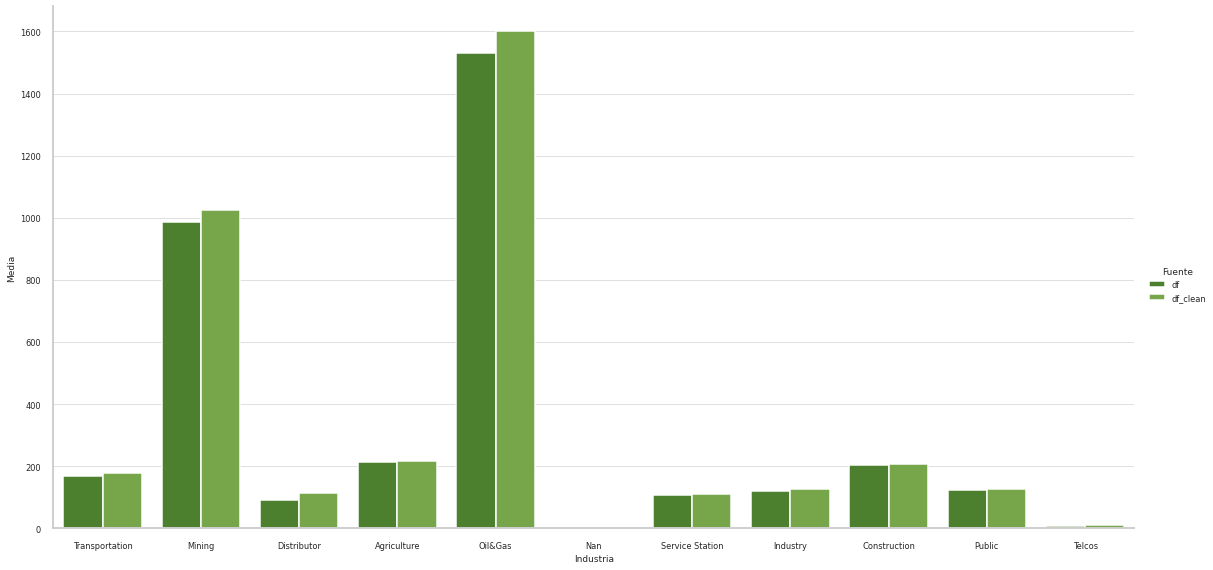

In [32]:
#Se grafica la comparación de las medias por industria con "df" y "df_cleaned"

data_mean = [['Transportation', 'df', mean_transp],
             ['Mining','df',mean_mining],
             ['Distributor','df', mean_distributor],
             ['Agriculture','df', mean_agriculture],
             ['Oil&Gas','df',mean_oilGas],
             ['Nan','df',mean_nan],
             ['Service Station','df',mean_service_station],
             ['Industry','df',mean_industry],
             ['Construction','df',mean_const],
             ['Public','df',mean_public],
             ['Telcos','df',mean_telcos],
             ['Transportation', 'df_clean', mean_transp2],
             ['Mining','df_clean',mean_mining2],
             ['Distributor','df_clean', mean_distributor2],
             ['Agriculture','df_clean', mean_agriculture2],
             ['Oil&Gas','df_clean',mean_oilGas2],
             ['Nan','df_clean',mean_nan2],
             ['Service Station','df_clean',mean_service_station2],
             ['Industry','df_clean',mean_industry2],
             ['Construction','df_clean',mean_const2],
             ['Public','df_clean',mean_public2],
             ['Telcos','df_clean',mean_telcos2]]
             
df_mean = pd.DataFrame(data_mean, columns = ['Industria','Fuente','Media'])

sns.factorplot(x='Industria', y='Media', hue='Fuente', data=df_mean, kind='bar',size=8, aspect=2)



####**>> CONCLUSIONES 1**

---
1.   Del gráfico anterior se puede obtener que:


*   **Oil&Gas** es el que posee la media más alta y **Telcos** la media más baja comparando todas las industrias del dataset
*   Visualmente las industrias **Public** y **Construction** son las que poseen menor variación en la media comparando `df_cleaned` vs `df`. Sería motivo de un análisis más detallado.
*   Visualmente **Oil&Gas** y **Mining** son las que poseen mayor diferencia entre `df_cleaned` vs `df`. Sería motivo de un análisis más detallado
*   La cantidad de industrias NaN es depreciable o nula


2.   De las tablas anteriores se puede obtener que:


*   Es notable que las siguientes industrias poseen valores negativos en las cantidades transaccionadas:

  *   **Distribuitor**
  *   **Service Station**
  *   **Industry**
  *   **Transportation**




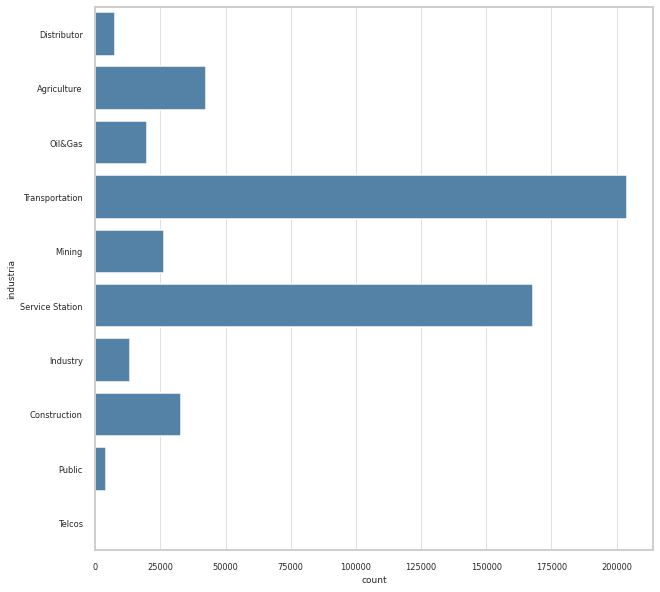

In [33]:
# Se realiza un gráfico de barras por industria y la cantidad de transacciones
fig = plt.figure(figsize=(10, 10))
sns.countplot(y=df.industria, color='steelblue')

####**>> CONCLUSIONES 2**

---

Si bien en el análisis anterior **Mining** y **Oil&Gas** eran las industrias con la media más alta, **Transportation** y **Service Station** son las que poseen mayor cantidad de transacciones.

## 1.3. **Se realiza análisis e identificación de outliers por industria**

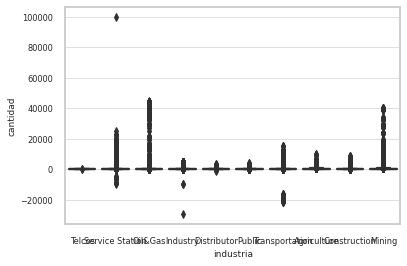

In [34]:
# Se grafican boxplots para identificar outliers empleando df

import matplotlib.pyplot as plt
import seaborn as sns

  

grouped = df.loc[:,['industria', 'cantidad']] \
    .groupby(['industria']) \
    .median() \
    .sort_values(by='cantidad')

sns.set_palette("colorblind")

sns.boxplot(x=df.industria, y=df.cantidad, order=grouped.index)

sns.set(rc={'figure.figsize':(20,22)})


####**>> CONCLUSIONES 1**

---

Analizando con `'df'` evidentemente existen outliers en practicamente todas las industrias, excepto en **Telcos**. Pero se puede estimar que en las siguientes la dispersión de los outliers es mayor:

*   **Service Station**
*   **Oil&Gas**
*   **Industry**
*   **Transportation**
*   **Mining**

Lo que se propone es analizar la correlación de estos outilers con las otras variables para llegar a determinar el motivo de la (potencial) falla/desvío. Si se identifica el motivo sería más simple poder apartarlas del análisis y luego analizar el comportamiento de consumo (normal) por serie de tiempo.

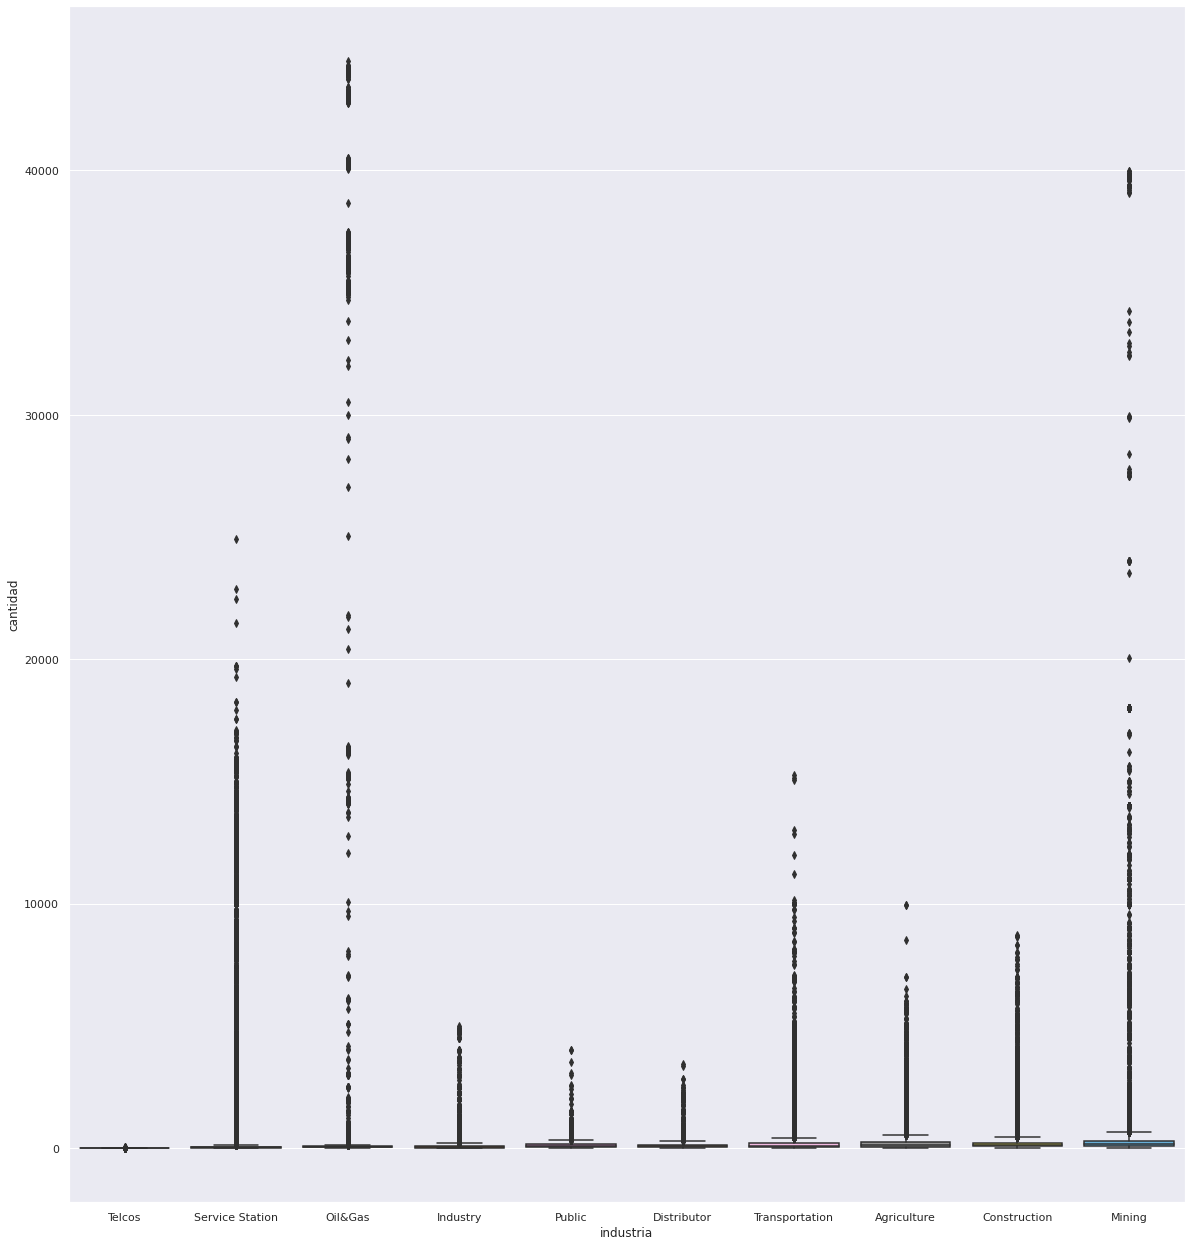

In [35]:
# Se grafican boxplots para identificar outliers empleando df_cleaned

import matplotlib.pyplot as plt
import seaborn as sns

  

grouped = df_cleaned.loc[:,['industria', 'cantidad']] \
    .groupby(['industria']) \
    .median() \
    .sort_values(by='cantidad')

sns.set_palette("colorblind")

sns.boxplot(x=df_cleaned.industria, y=df_cleaned.cantidad, order=grouped.index)

sns.set(rc={'figure.figsize':(16
                            ,22)})

####**>> CONCLUSIONES 2**

---
Ahora analizando el `'df_cleaned'` se observa que del análisis anterior con `'df'`, el segmento **Industry** ha mejorado su dispersión. Por lo tanto podríamos concluir que la limpieza del dataframe, afectó en mayor medida a este segmento.



## 1.4. **Se realiza análisis de patrones de consumo entre industrias**

* En primer lugar se analiza si trabajar con el campo `'cantidad'` o `'cantidad_comp_15'`
* Posteriormente se realiza el análisis de patrones de consumo

## 1.4.1 **Análisis de `'cantidad'` vs `'cantidad_comp_15'`**

In [36]:
#Se realiza un subconjunto acotando a menos variables el análisis. Se trabaja con df_cleaned

df_col = df_cleaned[["nombre_prod", "cantidad", "cantidad_comp_15", "codigo_error","industria"]]

In [37]:
#Se analiza la diferencias entre variables "cantidad" vs " cantidad_comp_15":

df_col["dif cant"] = df_col["cantidad"] - df_col["cantidad_comp_15"]
df_col.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,nombre_prod,cantidad,cantidad_comp_15,codigo_error,industria,dif cant
timestamp,,,,,,
2022-01-01 00:00:36,Product 1,158.42,158.42,C4,Distributor,0.00
2022-01-01 00:09:23,Infinia Diesel,336.01,333.09,C1,Agriculture,2.92
2022-01-01 00:10:25,Product 1,38.10,37.80,C4,Oil&Gas,0.30
2022-01-01 00:15:56,Diesel 500,734.90,734.90,BF,Transportation,0.00
2022-01-01 00:16:14,Diesel 500,752.65,752.65,BF,Transportation,0.00


In [38]:
df_col.describe()

,cantidad,cantidad_comp_15,dif cant
count,535239.00,535239.00,535239.00
mean,262.55,260.93,1.62
std,1732.30,1716.02,19.27
min,0.00,0.00,-425.00
25%,30.00,29.82,0.00
50%,64.28,63.76,0.07
75%,150.39,150.15,0.66
max,44491.40,43868.50,907.90


####**>> CONCLUSIONES**

---

Se utilizará la variable `'cantidad_comp_15'` dado que la diferencia con `'cantidad'` es depreciable. Por otro lado, la cantidad compensada permite realizar análisis independizandonos de la temperatura.

## 1.4.2 **Análisis de patrones de consumo por industria**

In [39]:
# Se propone trabajar con las siguientes variables para el análisis de patrones de consumo

df_col = df_col[["nombre_prod", "cantidad_comp_15",
        "industria"]]

In [40]:
# Se realiza análisis descriptivo de las 3 variables seleccionadas 

grouped_industria = df_col.groupby("industria")
grouped_industria.head()

,nombre_prod,cantidad_comp_15,industria
timestamp,,,
2022-01-01 00:00:36,Product 1,158.42,Distributor
2022-01-01 00:09:23,Infinia Diesel,333.09,Agriculture
2022-01-01 00:10:25,Product 1,37.80,Oil&Gas
2022-01-01 00:15:56,Diesel 500,734.90,Transportation
2022-01-01 00:16:14,Diesel 500,752.65,Transportation
2022-01-01 00:32:31,Product 1,57.49,Oil&Gas
2022-01-01 00:40:46,Gasoil GOM G3,266.78,Mining
2022-01-01 00:45:04,Gasoil GOM G3,280.94,Mining
2022-01-01 00:47:01,Diesel 500,466.94,Transportation


In [41]:
double_group =df_col.groupby(["industria", "nombre_prod"])
double_group.head()

,nombre_prod,cantidad_comp_15,industria
timestamp,,,
2022-01-01 00:00:36,Product 1,158.42,Distributor
2022-01-01 00:09:23,Infinia Diesel,333.09,Agriculture
2022-01-01 00:10:25,Product 1,37.80,Oil&Gas
2022-01-01 00:15:56,Diesel 500,734.90,Transportation
2022-01-01 00:16:14,Diesel 500,752.65,Transportation
2022-01-01 00:32:31,Product 1,57.49,Oil&Gas
2022-01-01 00:40:46,Gasoil GOM G3,266.78,Mining
2022-01-01 00:45:04,Gasoil GOM G3,280.94,Mining
2022-01-01 00:47:01,Diesel 500,466.94,Transportation


In [42]:
double_group.sum()

cantidad_comp_15
industria       nombre_prod                                
Agriculture      Gasoil                            28669.04
                BIODIESEL                           8381.17
                Cereales Norte SA                  31163.09
                DIESEL                            113829.86
                DIESEL 1                          186036.55
                Diesel                             42393.42
                Diesel 500                        113300.63
                Diesel 500 G2                      96422.90
                Diesel Grado 2                    156579.37
                Diesel Grado 3                      7367.67
                EURODIESEL                         48663.24
                Euro                               96969.35
                Euro G3                             1512.47
                Euro-Diesel                        49164.58
                GAS OIL                           346749.64
                GAS OIL                            65712.52
                GAS OIL 500                        49991.60
                GASOIL                            132040.29
                GASOIL 1                           49191.10
                GASOIL 2                           18590.79
                GASOIL G3                          26608.42
                Gas Oil                            38317.94
                Gasoil                            848389.45
                Gasoil                             74164.08
                Gasoil Comun                        7973.39
                Gasoil Infinia                      4027.11
                Infinia                             9703.90
                Infinia Diesel                     43942.91
                Product 1                        4412123.59
                Product 2                         381269.24
                Producto 0                        520348.51
                Producto 1                        170251.20
                Producto 2                        397434.65
                Puerto Seco La Puerta SA           43917.06
                S1002050010                        26167.95
                Ultra Diesel                      202446.14
                Ultra-Diesel                      151511.64
Construction    Comun                              26597.81
                Diesel                            279935.10
                Diesel 500                         83844.99
                Diesel 500 PPM                    673149.01
                Euro                               20564.26
                Euro Diesel                        55537.39
                Euro Diesel Grado3                   765.37
                GAS OIL                           104764.13
                GASOIL                            136939.33
                Gas Oil                            52106.56
                Gas Oil Comun Gr 2                665977.59
                Gas Oil Comun Gr 2                276622.61
                Gas Oil Euro Gr 3                 586938.27
                Gasoil                             69257.98
                Gasoil 500                        143206.39
                INFINIA DIESEL                     38349.18
                None                                 238.24
                Product 1                        1203713.18
                Product 2                         182260.97
                Producto 0                       1647323.96
                Producto 1                        480888.34
Distributor     Diesel 500                           702.26
                None                               34180.00
                Product 1                         454648.68
                Producto 0                         18021.87
                Producto 1                        196521.82
Industry        Diesel                            137732.33
                Gas Oil                           139996.43
                Gasoil 

In [43]:
double_group.mean()

cantidad_comp_15
industria       nombre_prod                                
Agriculture      Gasoil                              175.88
                BIODIESEL                           1396.86
                Cereales Norte SA                    201.05
                DIESEL                               555.27
                DIESEL 1                             197.91
                Diesel                               184.32
                Diesel 500                           186.35
                Diesel 500 G2                        345.60
                Diesel Grado 2                       308.84
                Diesel Grado 3                        59.90
                EURODIESEL                           371.48
                Euro                                 210.35
                Euro G3                               54.02
                Euro-Diesel                          154.12
                GAS OIL                              212.60
                GAS OIL                               76.95
                GAS OIL 500                          290.65
                GASOIL                               209.59
                GASOIL 1                             223.60
                GASOIL 2                             350.77
                GASOIL G3                            167.35
                Gas Oil                               49.76
                Gasoil                               191.29
                Gasoil                               229.61
                Gasoil Comun                          48.32
                Gasoil Infinia                        55.17
                Infinia                               94.21
                Infinia Diesel                       109.86
                Product 1                            257.99
                Product 2                            135.44
                Producto 0                           225.36
                Producto 1                           142.59
                Producto 2                           188.27
                Puerto Seco La Puerta SA             264.56
                S1002050010                           56.64
                Ultra Diesel                         346.65
                Ultra-Diesel                         335.20
Construction    Comun                                197.02
                Diesel                               135.04
                Diesel 500                           128.01
                Diesel 500 PPM                       145.92
                Euro                                 216.47
                Euro Diesel                          528.93
                Euro Diesel Grado3                   127.56
                GAS OIL                              134.83
                GASOIL                               276.09
                Gas Oil                              123.18
                Gas Oil Comun Gr 2                   184.53
                Gas Oil Comun Gr 2                  2537.82
                Gas Oil Euro Gr 3                    197.36
                Gasoil                                92.47
                Gasoil 500                           142.21
                INFINIA DIESEL                        85.60
                None                                 238.24
                Product 1                            182.13
                Product 2                            184.85
                Producto 0                           253.32
                Producto 1                          2504.63
Distributor     Diesel 500                            29.26
                None                                 488.29
                Product 1                            126.47
                Producto 0                           160.91
                Producto 1                            81.71
Industry        Diesel                               678.48
                Gas Oil                              214.06
                Gasoil 

####**>> CONCLUSIONES 1**

---

Luego de realizar una serie de agrupaciones para explorar los datos se decide trabajar sobre las siguientes columnas, dado que el campo `'producto'` necesitaría un análisis aparte:

In [44]:
df_columns = df_col[[ "cantidad_comp_15","industria"]]
df_columns.head()

,cantidad_comp_15,industria
timestamp,,
2022-01-01 00:00:36,158.42,Distributor
2022-01-01 00:09:23,333.09,Agriculture
2022-01-01 00:10:25,37.80,Oil&Gas
2022-01-01 00:15:56,734.90,Transportation
2022-01-01 00:16:14,752.65,Transportation


In [45]:
#Se crea un df con las medias por industria del df_col (que es calculada en función de df_cleaned)

transp_df = df_col[df_col["industria"]=="Transportation"]
mining_df = df_col[df_col["industria"]=="Mining"]
distributor_df = df_col[df_col["industria"]=="Distributor"]
agriculture_df = df_col[df_col["industria"]=="Agriculture"]
oilGas_df = df_col[df_col["industria"]=="Oil&Gas"]
nan_df = df_col[df_col["industria"]=="nan"]
service_station_df = df_col[df_col["industria"]=="Service Station"]
industry_df = df_col[df_col["industria"]=="Industry"]
const_df = df_col[df_col["industria"]=="Construction"]
public_df = df_col[df_col["industria"]=="Public"]
telcos_df = df_col[df_col["industria"]=="Telcos"]


In [46]:
transp_df.head() 

,nombre_prod,cantidad_comp_15,industria
timestamp,,,
2022-01-01 00:15:56,Diesel 500,734.90,Transportation
2022-01-01 00:16:14,Diesel 500,752.65,Transportation
2022-01-01 00:47:01,Diesel 500,466.94,Transportation
2022-01-01 01:46:30,Diesel 500,455.82,Transportation
2022-01-01 02:21:27,Diesel 500,107.85,Transportation


Text(0.5, 1.0, 'Telcos')

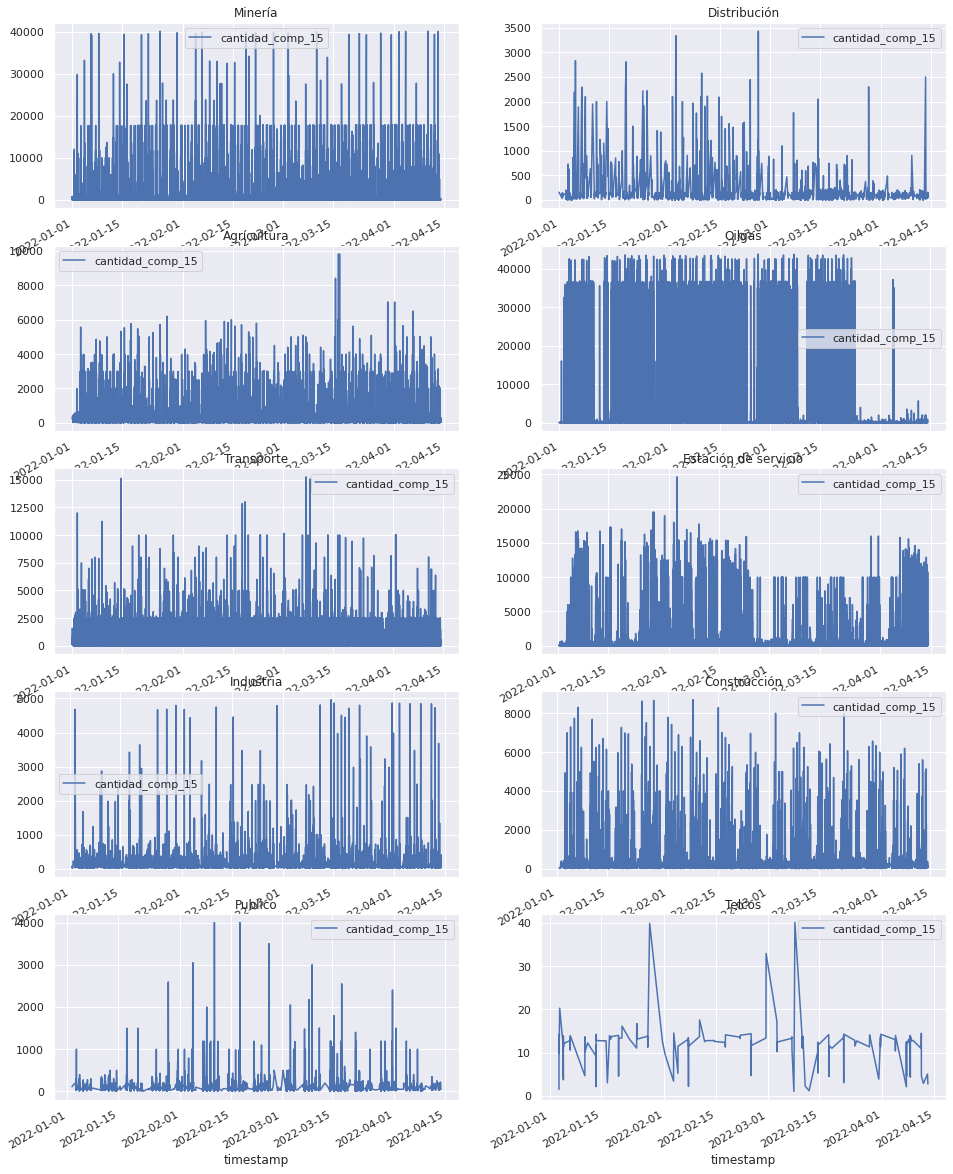

In [47]:
#Se realizan gráficos para analizar patrones de consumo, trabajando con df_cleaned

#define number of rows and columns for subplots
nrow=5
ncol=2

# make a list of all dataframes 

df_list=[mining_df, distributor_df, agriculture_df, oilGas_df, transp_df, service_station_df, industry_df, const_df,
        public_df, telcos_df]

fig, axes = plt.subplots(nrow, ncol)

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(ax=axes[r,c])
        count+=1
# Labels

axes[0, 0].set_title("Minería")
axes[0, 1].set_title("Distribución")
axes[1, 0].set_title("Agrícultura")
axes[1, 1].set_title("Oilgas")
axes[2, 0].set_title("Transporte")
axes[2, 1].set_title("Estación de servicio")
axes[3, 0].set_title("Industria")
axes[3, 1].set_title("Construcción")
axes[4, 0].set_title("Publico")
axes[4, 1].set_title("Telcos")



####**>> CONCLUSIONES 2**

---

**Mining**
* Se observa un patrón de consumo constante con cantidad 20000L (Aproximadamente)
* Se podría establecer que periódicamente tienen consumos altos (>20000L) pero con menor frecuencia

**Distribution**
* Se puede evidenciar una caida de consumo a partir del mes Marzo

**Agriculture**
* En general los consumos son menores a 8000 L
* Se pueden observar unos outliers que superan los 8000 L

**Oil&Gas**
* Se puede evidenciar una caída de consumo a partir de Abril

**Estación de Servicio**
* Podría presumirse cierta estacionalidad en el consumo. Siendo de Enero a Marzo el período con mayor consumo. De Marzo a Abril se observa un "valle" en el consumo.

**Público**
* Se puede evidenciar uun pico de consumo de Enero a Marzo

## 1.4.3 Agrupación por tiempo
________________________________________________________________________________

Seleccionar una o dos industrias. Realizar un análisis descriptivo ahora teniendo en cuenta periodos de tiempo (día de la semana, semana, día del mes, etc). ¿Se observan comportamientos distintos según el periodo de tiempo?

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [48]:
# Agrupación por periodo
import pandas
df.groupby(pandas.Grouper(freq='1D'))["cantidad_comp_15"].mean().head()

timestamp
2022-01-01   140.44
2022-01-02   340.25
2022-01-03   202.75
2022-01-04   226.92
2022-01-05   235.77
Freq: D, Name: cantidad_comp_15, dtype: float64

In [49]:
t_d = transp_df.groupby(pandas.Grouper(freq='1D'))["cantidad_comp_15"].mean().head()

In [50]:
m_d = mining_df.groupby(pandas.Grouper(freq='1D'))["cantidad_comp_15"].mean().head()

In [51]:
t_w = transp_df.groupby(pandas.Grouper(freq='W'))["cantidad_comp_15"].mean().head()

In [52]:
m_w = mining_df.groupby(pandas.Grouper(freq='W'))["cantidad_comp_15"].mean().head()

In [53]:
t_m = transp_df.groupby(pandas.Grouper(freq='M'))["cantidad_comp_15"].mean().head()

In [54]:
m_m = mining_df.groupby(pandas.Grouper(freq='M'))["cantidad_comp_15"].mean().head()

In [55]:
t_q = transp_df.groupby(pandas.Grouper(freq='Q'))["cantidad_comp_15"].mean().head() #trimestre

In [56]:
m_q = mining_df.groupby(pandas.Grouper(freq='Q'))["cantidad_comp_15"].mean().head()

In [57]:
t_a = transp_df.groupby(pandas.Grouper(freq='A'))["cantidad_comp_15"].mean().head()

In [58]:
m_a = mining_df.groupby(pandas.Grouper(freq='A'))["cantidad_comp_15"].mean().head()

In [59]:
t_d = pandas.DataFrame(t_d)
m_d = pandas.DataFrame(m_d)
t_w = pandas.DataFrame(t_w)
m_w = pandas.DataFrame(m_w)
t_m = pandas.DataFrame(t_m)
m_m = pandas.DataFrame(m_m)
t_q = pandas.DataFrame(t_q)
m_q = pandas.DataFrame(m_q)

In [60]:
t_d.head()

,cantidad_comp_15
timestamp,
2022-01-01,161.27
2022-01-02,202.00
2022-01-03,194.04
2022-01-04,162.51
2022-01-05,167.88


Text(0.5, 1.0, 'Canidades medias trimestrales Minería')

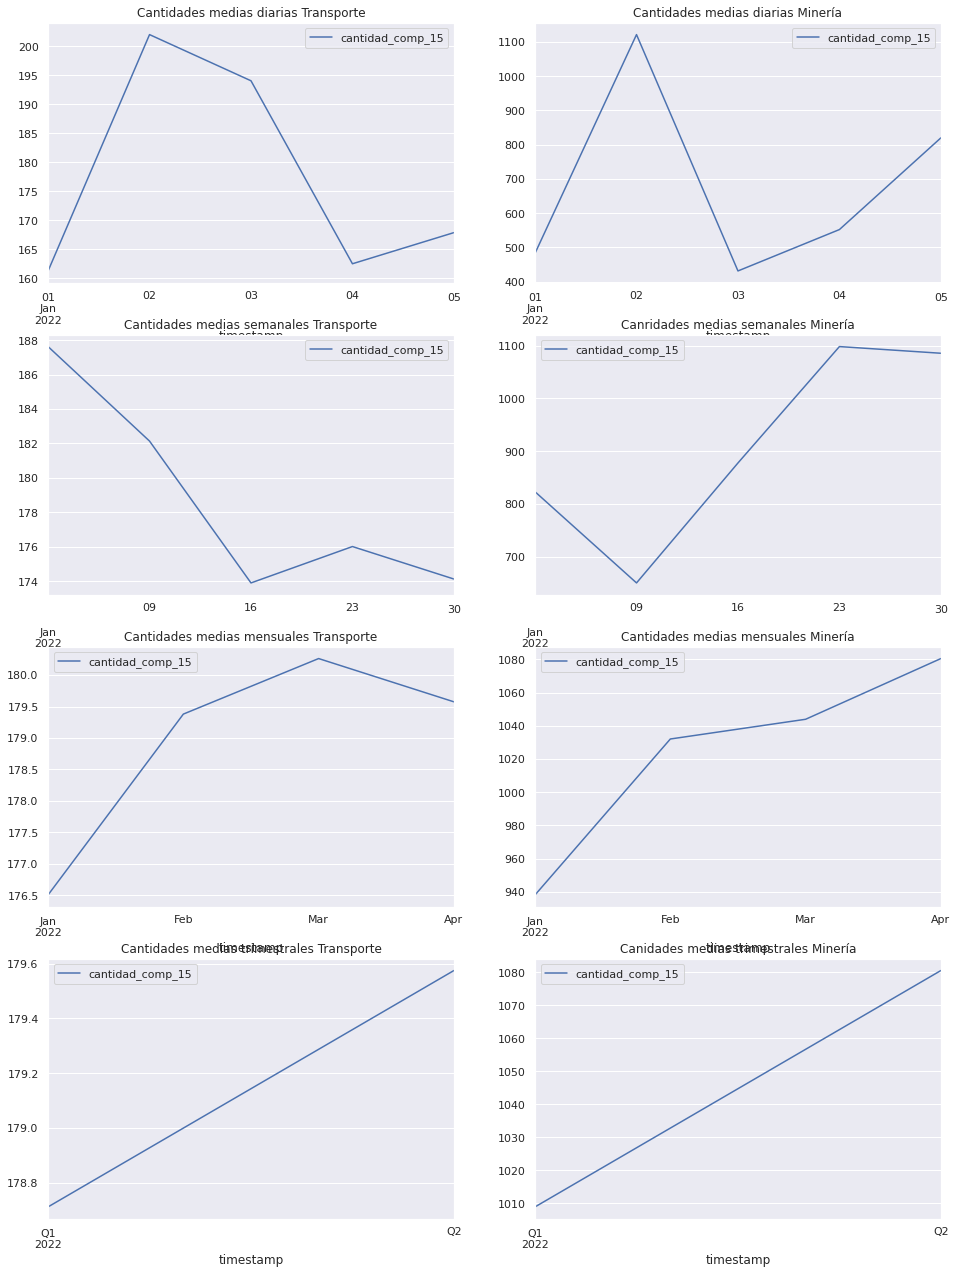

In [61]:
#define number of rows and columns for subplots
nrow=4
ncol=2

# make a list of all dataframes 

df_list=[t_d, m_d, t_w, m_w, t_m, m_m, t_q, m_q]

fig, axes = plt.subplots(nrow, ncol)

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(ax=axes[r,c])
        count+=1
# Labels
axes[0, 0].set_title("Cantidades medias diarias Transporte")
axes[0, 1].set_title("Cantidades medias diarias Minería")
axes[1, 0].set_title("Cantidades medias semanales Transporte")
axes[1, 1].set_title("Canridades medias semanales Minería")
axes[2, 0].set_title("Cantidades medias mensuales Transporte")
axes[2, 1].set_title("Cantidades medias mensuales Minería")
axes[3, 0].set_title("Cantidades medias trimestrales Transporte")
axes[3, 1].set_title("Canidades medias trimestrales Minería")



El comportamiento de las cantidades *medias* despachadas para las industria de *transporte* y *minera* es similar en la agrupación por día y por trimestre. Mas allá de que la actividad minera tiene un consumo medio mucho más elevado a lo largo del tiempo. 

En la agrupación mensual de las cantidades medias despachadas la industria de transporte muestra un crecimiento constante de las cantidades medias despachadas hasta el mes de marzo(alcanzando un máximo) y luego decrece. Mienstras que en la actividad minera se estabilizan las cantidades despachadas en febrero y comienzan a crecer a partir del mes de marzo.

# 2. Visualización de Outliers
________________________________________________________________________________



In [62]:
# 1) listar las columnas del data frame, para conocer/recordar las columnas 
df.columns.values

array(['unique_id_transa', 'id_transaccion', 'id_vehiculo', 'id_usuario',
       'id_equipo', 'veh_site_id', 'pump_site_id', 'tank_site_id',
       'user_site_id', 'producto', 'id_bomba', 'id_tanque',
       'departamento', 'cantidad', 'codigo_error', 'timestamp_stop',
       'nombre_prod', 'veh_efficiency', 'volumen_inicial',
       'volumen_final', 'temp_inicial', 'temp_final',
       'volumen_comp_15_inicial', 'volumen_comp_15_final',
       'cantidad_comp_15', 'codigo_producto', 'geo_latitud',
       'geo_longitud', 'id_empresa', 'id_industria', 'industria'],
      dtype=object)

### **2.1 Variables de interés** ##
1. `'nombre_producto'`
2. `'cantidad'`
3. `'industria'`



## **2.2 Análisis de las variables: Distribución, Outliers**##

##Variable: Producto
Para analizar las distribuciones por producto, será necesario normalizar nombres como "Gasoil" y "GAS-OIL" y descartar aquellos imposible de indentificar como "Cereales Norte SA", "Propucto 1", 'Puerto Seco La Puerta SA', etc.

In [63]:
df.shape


(561747, 31)

In [64]:
# Se verifica si la variable muestra valores nulos
df_nombre_prod= df.nombre_prod
dfnull= df_nombre_prod.isnull().sum()
dfnull

0

In [65]:
#Se normalizan nombres
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Diesel 500", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Gas Oil", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Gasoil", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Infinia Diesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("DIESEL", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Diesel Grado 2", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("GASOIL", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Ultra Diesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Formula Diesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Diesel GOM G3", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Diesel Grado 3", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("GOM", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("V-Power Diesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("VP Diesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("GAS-OIL - GRADO 3", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Diesel 2", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("INFINIA Diesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("EURODiesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Diesel Diesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Evolux Diesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("VP-Diesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Euro Diesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Diesel Infinia", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Euro Diesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Diesel Infinia'", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Euro-Diesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Diesel Comun", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Diesel Euro Gr 3", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Diesel grado 2", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Infinia Diésel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Diesel-500", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Diesel 1", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("GAS OIL", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Diesel ", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("COMBUSTIBLE -  Diesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("ULTRA Diesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Diesel EURO", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Diesel PPM", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Diesel Premium", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("ULTRADiesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("COMBUSTIBLE -  Diesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace(" Diesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("DieselEURO", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("DieselPPM", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Producto 1 -Diesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("AxionDiesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("DieselGr 2", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Producto 1-Diesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Producto 2 -Diesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("DieselGrado3", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("DieselG3", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("DieselPremium", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Diesel500", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Diesel ", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("D 500", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("DieselMarítimo", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("BIODiesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("GAS-OIL", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("DieselG2", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Diesel-Diesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("QUANTIUMDiesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Ultra-Diesel", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Euro G3", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Euro", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("B100", "Diesel"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("EURO", "Diesel"))

df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Nafta Super", "Nafta"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("V-Power Nafta", "Nafta"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("VP Nafta", "Nafta"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Infinia", "Nafta"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("INFINIA", "Nafta"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Azul 32", "Nafta"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Comun", "Nafta"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("INFINIA T20", "Nafta"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Nafta T40", "Nafta"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Nafta T20", "Nafta"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("COMUN", "Nafta"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("Super", "Nafta"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("INFINIA T20", "Nafta"))
df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("nafta", "Nafta"))

df["nombre_prod"] = df["nombre_prod"].apply(lambda x: x.replace("UREA", "Nafta"))


In [66]:
df['nombre_prod'].unique()

array(['Product 1', 'Diesel', 'Producto 0', 'Product 3', 'Nafta',
       'Product 2', 'Producto 1', 'Formula', 'Urea', 'Glifosato',
       'Producto 2', 'Puerto Seco La Puerta SA', 'Cereales Norte SA',
       'S1002050010', 'UD', 'None', 'Combustible'], dtype=object)

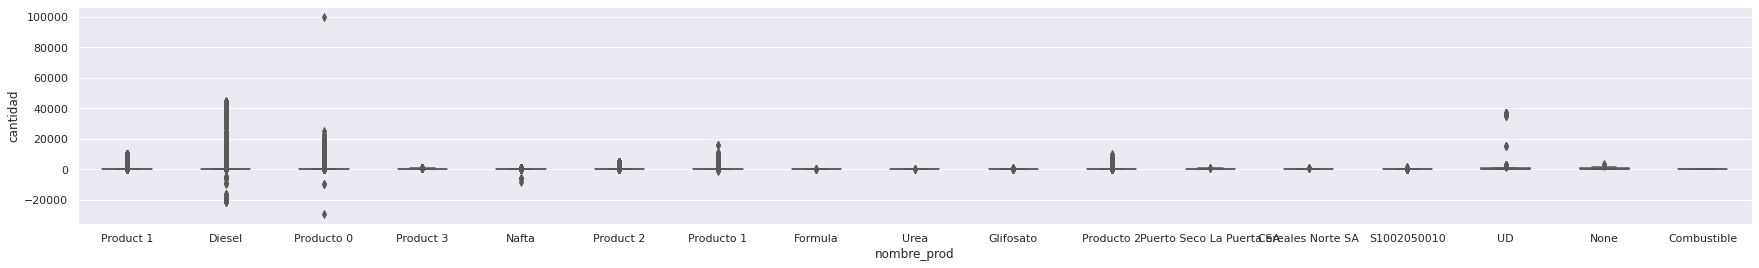

In [67]:
from numpy.lib.function_base import median
#Se propone hacer un boxplot/Subplot y cálculo de la media, a los fines de obtener conclusiones sobre la distribución de los valores 
sns.set(rc={"figure.figsize":(30, 4)})
box = sns.boxplot(x = 'nombre_prod', y = 'cantidad', data=df, width=0.5, fliersize=5,palette="Set2")
box

No se cuenta con mayores espesificaciones sobre algunos productos, ante la limitación de no contar con algún tipo de feeback útil para subsanar dudas sobre la catalogaciones pocos descriptivas o erroneas del dataframe, se propone eliminar los productos definidos como: 

             a) Producto 0,1,2,3 y todos sus nombres derivados
             b) Puerto Seco La Puerta SA
             c) Cereales Norte SA'
             d)'None'
             e)'Combustible'

In [68]:
values=['Producto 0', 'Product 1', 'Product 2', 'Product 3', 'Producto 1', 'Producto 2','Puerto Seco La Puerta SA', 'Cereales Norte SA', 'None', 'Combustible' ]
df_productos_ok = df[~df.nombre_prod.isin(values)]

In [69]:
df_productos_ok  ['nombre_prod'].unique()

array(['Diesel', 'Nafta', 'Formula', 'Urea', 'Glifosato', 'S1002050010',
       'UD'], dtype=object)

In [70]:
len(df_productos_ok['nombre_prod'].unique())

7

De un total de 102 productos del DF orignal, quedaron resumidos y filtrados 7: 'Diesel', 'Nafta', 'Formula', 'Urea', 'S1002050010', 'Glifosato', 'UD

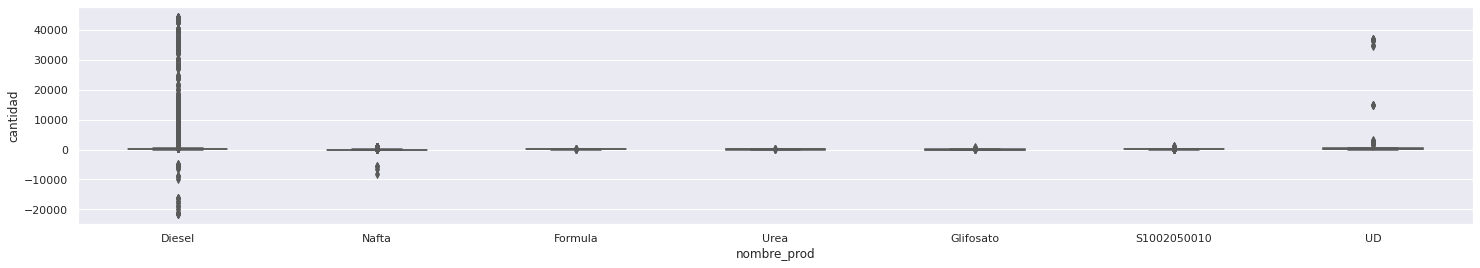

In [71]:
from numpy.lib.function_base import median
sns.set(rc={"figure.figsize":(25, 4)})
box = sns.boxplot(x = 'nombre_prod', y = 'cantidad', data=df_productos_ok, width=0.5, fliersize=5,palette="Set2")
box

In [72]:
reg_prod_ok= len(df_productos_ok)
reg_prod_ok

376164

In [73]:
reg_prod= len(df)
reg_prod

561747

In [74]:
porcentaje_prod_ok= reg_prod_ok/reg_prod
porcentaje_prod_ok

0.6696324145923342

####**>> CONCLUSIONES**
- - -

1. La variable `'nombre_producto'` no observa valores nulos.
2. Al eliminar los productos "no especificados" o de especificación indefinida, nos queda un 67% de registros de la base original. Por esta razón, se recomienda buscar alternativas de re-definición en base a algún criterio consensuado, a los fines de aminorar la cantidad de registrso eliminados.
3. Valores como diesel y nafta muestran consumos "negativos" importantes
4. Diesel y UD muestran outliers por encima de sus máximos en una proporción mucho mayor que los demás productos.



##Variable: Cantidad

Se propone trabajar sobre la variable cantidad analizado:

1. Para outliers menores al mínimo: según se observa en el gráfico de caja anterior, algunos productos como Diesel, Nafta y otros muestras cargas "negativas" posiblemente relacionados  a la reposición de tanques de almacenamiento del cliente. Estos valores se descartan dado, que queremos analizar el consumo de combustibles y no su reposición. En todo caso, sería conveniente realizar un análisis por equipo, usuario, etc para descartar cualquier tipo de anomalías por fallas de equipos o mal uso de los mismos.

In [75]:
# verificamos si la variable muestra valores nulos
df_cant= df.cantidad
dfnull= df_cant.isnull().sum()
dfnull

0

In [76]:
df_sin_negativos = df_productos_ok[(df_productos_ok.cantidad > 0)]

2. Para outliers mayores al máximo: se propone trabajar con un gráfico de caja, analizando los valores por encima del máximo y su ponderación con respecto a la muestra total. En primera instancia se propone "topear" los consumos de combustibles en un máximo de 50.000 lt, entendiendo que no existe ningún vehículo en las industrias, capaz de cargar una cantidad mayor.

In [77]:
df_menor_50000 = df_sin_negativos[(df_sin_negativos.cantidad <50000)]

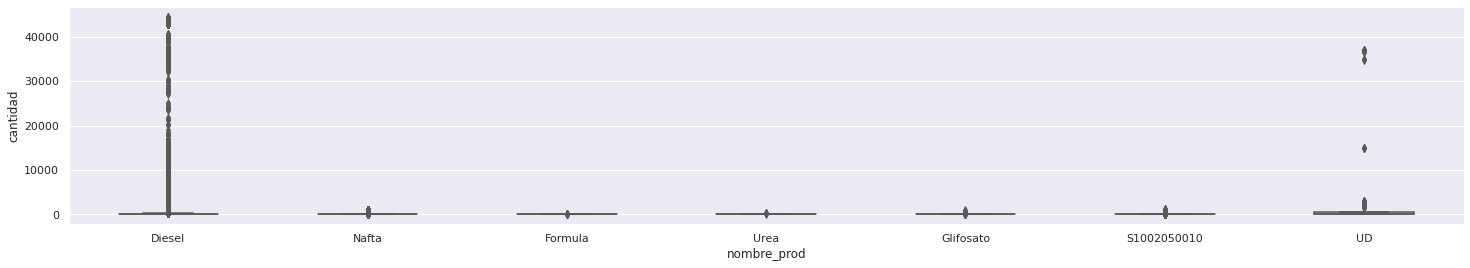

In [78]:
from numpy.lib.function_base import median
sns.set(rc={"figure.figsize":(25, 4)})
box = sns.boxplot(x = 'nombre_prod', y = 'cantidad', data=df_menor_50000, width=0.5, fliersize=5,palette="Set2")
box

Diesel y UD siguen mostrando importantes outliers, impidiendo observar las dispercion y distribución de sus datos. Se propone filtrár por cargas menores a 500 litros a los fines de poder visualizar mejor las cajas y máximos:

In [79]:
#determinamos la base "curada" de productos y outliers de cantidad:
df_menor_500 = df_sin_negativos[(df_sin_negativos.cantidad <500)]

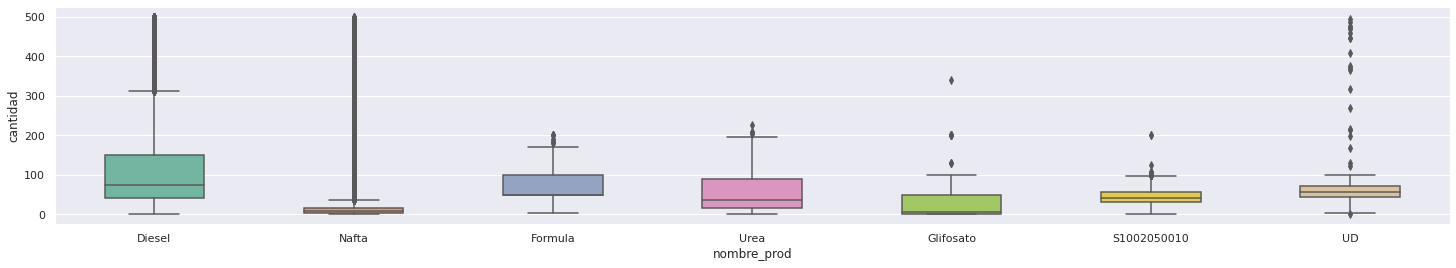

In [80]:
from numpy.lib.function_base import median
sns.set(rc={"figure.figsize":(25, 4)})
box = sns.boxplot(x = 'nombre_prod', y = 'cantidad', data=df_menor_500, width=0.5, fliersize=5,palette="Set2")
box

In [81]:
reg_menor_500= len(df_menor_500)
reg_menor_500

338007

In [82]:
#Calculamos el porcentaje de la nueva base (cargas menor a 500 litros) sobre la base de registros positivos (df_sin_negativos) 
#para tener una aproximación de cuantos datos se "pierden" por el filtro propuesto.
porcentaje_menor_500 = reg_menor_500/len(df_sin_negativos)
porcentaje_menor_500

0.9418726157601562

In [83]:
#se calcula la media de consumo de Diesel para la nueva población para sacar conclusiones posteriores
Diesel= df_menor_500[(df_menor_500.nombre_prod == 'Diesel')]
Diesel['cantidad'].describe().round()


count   246140.00
mean       117.00
std        110.00
min          0.00
25%         42.00
50%         74.00
75%        150.00
max        500.00
Name: cantidad, dtype: float64

In [84]:
#se calcula la media de consumo de nafta para la nueva población para sacar conclusiones posteriores
Nafta = df_menor_500[(df_menor_500.nombre_prod == 'Nafta')]
Nafta['cantidad'].describe().round()

count   87582.00
mean       17.00
std        42.00
min         0.00
25%         2.00
50%         8.00
75%        17.00
max       500.00
Name: cantidad, dtype: float64

3. Por último, proponemos realizar un análisis para corroborar la correlación entre cantidad y cantidad compensada a 15 grados para evaluar si en necesario trabajar con las dos columnas o no.

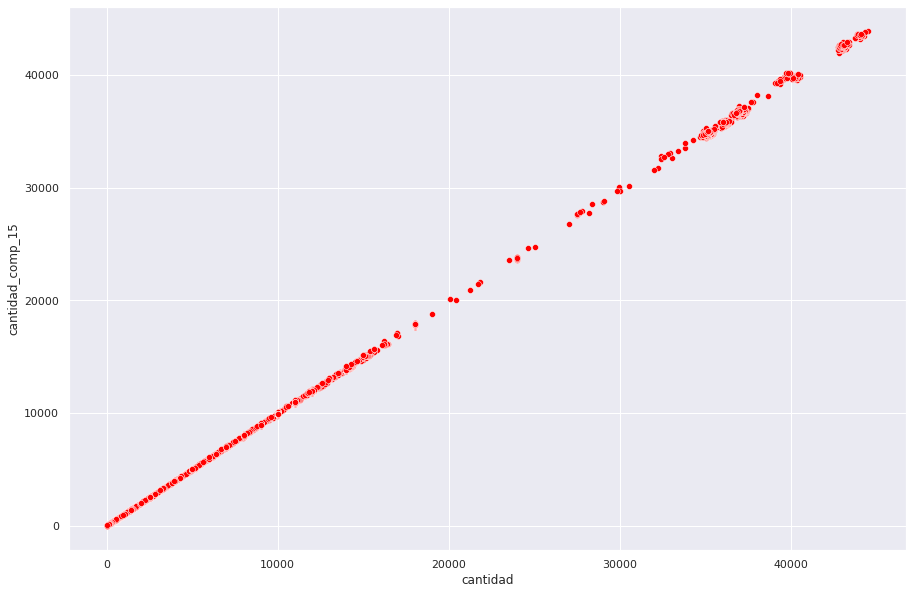

In [85]:
fig = plt.figure(figsize = (15, 10))
sns.scatterplot(data = df_sin_negativos, x = 'cantidad', y = 'cantidad_comp_15', color = 'red')

In [86]:
Cantidades = df_sin_negativos[['cantidad', 'cantidad_comp_15']]
Cantidades.corr()

,cantidad,cantidad_comp_15
cantidad,1.00,1.00
cantidad_comp_15,1.00,1.00


####**>> CONCLUSIONES**
- - -


1. El 94 % de los registros son cargas menores a 500 litros

2.  Al analizar el universo acotado a cargas menores a 500 litros podemos decir que:

  >  Del cuadro de caja, se observa que la media de consumo de diesel es mucho mayor a las medias de cosumo de otros productos como por ejemplo Nafta. La media de consumos de "Diesel" (117 litros) es casi 7 veces más que la media de consumo de nafta (17 litros).

 >  Consumos medios de Diesel y glifosfato parecen estar muy influenciados por consumos altos, en comparacion con otros produtos.

4. Las variable cantidad y cantidad compensada a 15 grados, muestra una muy fuerte correlación con coeficientes de correlacion muy cercanos a 1. 

5. Algunos registros NO muestran datos de cantidad compensada a 15 grados, por esto y dado la gran correlación entre las variables, se recomienda trabajar con la columna "cantidad".


##Variable: Industria
En primera instancia se propone visualizar los consumos por industrias desde la perspectiva del produto consumido, dado que cualquier inferencia sin esta discriminación, puede provocar errores al querer comparar consumos de productos muy distintos. Podemos estar comparando el consumo total de una industria que consume Nafta y Urea contra otra que solo consume Diesel.

In [87]:
df_productos_ok  ['industria'].unique()

array(['Agriculture', 'Transportation', 'Mining', nan, 'Oil&Gas',
       'Service Station', 'Construction', 'Industry', 'Public', 'Telcos',
       'Distributor'], dtype=object)

In [88]:
df_productos_ok  ['nombre_prod'].unique()

array(['Diesel', 'Nafta', 'Formula', 'Urea', 'Glifosato', 'S1002050010',
       'UD'], dtype=object)

In [89]:
# verificamos si la variable muestra valores nulos
df_ind= df_sin_negativos.industria
dfnull_ind= df_ind.isnull().sum()
dfnull_ind

24046

In [90]:
total_reg= len(df_sin_negativos)
total_reg

358867

In [91]:
porcentaje_null_ind= dfnull_ind/total_reg
porcentaje_null_ind

0.06700532509258304

Un 6 % de los registros en la variable "industria" son nulos, esto equivale a 24.046 registros. Se propone eliminar estos registros.

In [92]:
#eliminamos los registros nulos.
df_ind_sin_null = df_productos_ok.dropna(subset=["nombre_prod"])

In [93]:
# hacer una crosstab para comparar la cantidad de registros por producto e industria
x = pd.crosstab (df_ind_sin_null.industria, df_ind_sin_null.nombre_prod) 

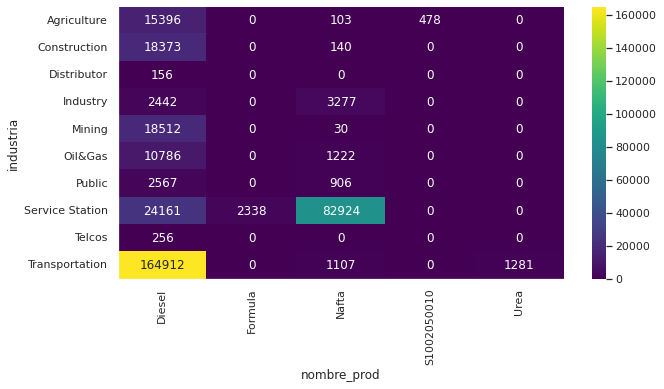

In [94]:
figure = plt.figure(figsize = (10,5))
sns.color_palette("viridis", as_cmap=True)

sns.heatmap(x, annot=True, fmt='g', cmap = 'viridis')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
sns.despine()

In [95]:
# se observa gran concentración de registros en diesel-transportacion y nafta-estaciones de servicio
#Calculamos su ponderacion en el total de registros que informan industria
gran_concentracion=(164912+82924)/len(df_ind_sin_null)
gran_concentracion

0.6588509267234504

Casi el 66% de los registros se concentra en el consumo de Diesel de la industria de la transportación y consumo de Nafta de la industria de estaciones de servicio.

Vemos que los productos UD y S1002050010 muestran valores nulos para la variable "industria". Calculamos la incidencia de eliminar dichos registrso:

In [96]:
#calculamos los registros que no informan industria : producto UD
registros_UD = df_sin_negativos.apply(lambda x : True
            if x['nombre_prod'] == "UD" else False, axis = 1) 
num_rows_UD = len(registros_UD[registros_UD == True].index) 
num_rows_UD

168

In [97]:
#calculamos los registrso que no informan industria : producto S1002050010
registros_S1002050010 = df_sin_negativos.apply(lambda x : True
            if x['nombre_prod'] == "S1002050010" else False, axis = 1) 
num_rows_S1002050010 = len(registros_S1002050010[registros_S1002050010 == True].index) 
num_rows_S1002050010

462

In [98]:
reg_sin_industria=num_rows_UD+num_rows_S1002050010
reg_sin_industria

630

In [99]:
#calculamos el % de registros que NO informan industrias sobre el total de registrso que SI informan industria
porcentaje_reg_sin_industria=reg_sin_industria/len(df_productos_ok)
porcentaje_reg_sin_industria

0.0016748014164034836

Los productos "S1002050010" y "UD" no informan en ningunos de sus registros la industria, pero estos son apenas el 0.2% de la muestra total, por lo que se puede descartar a los fines de analizar desde la variable "Industria".

In [100]:
# obtenemos la base limpía de los registrso antes mencionados:
values=['UD', 'S1002050010']
df_industria_ok = df_productos_ok[~df_productos_ok.nombre_prod.isin(values)]

In [101]:
reg_df_industria_ok= len(df_industria_ok)
reg_df_industria_ok

375517

In [102]:
porcentaje_industria_ok=reg_df_industria_ok/len(df_productos_ok)
porcentaje_industria_ok

0.9982800055295031

####**>> CONCLUSIONES**
- - -


1. La variable "industria" parece un buen "agrupador" dado que se informa en mas del 99% de los registros.
2. Al interactuar esta variable con `'nombre_producto'` se observa que gran parte de los registros (más de un 65%) se agrupan en solo dos interaciones. producto-industria:

> diesel-transporte

> nafta-estaciones de servicio

## **2.2 Analizar las distribuciones agrupando por cualidades en común**##

Se propone trabajar sobre las variable producto=diesel, por la gran cantidad de  registros que muestra,  y posteriormente vamos a agruparlas por industria y sacar conclusiones sobre su distribuciones y outliers.

In [103]:
#trabajamos sobre un df que contenga todos los consumos mayores a 0 (df_sin_negativos)
df_Diesel= df_sin_negativos[(df_sin_negativos.nombre_prod == 'Diesel')]


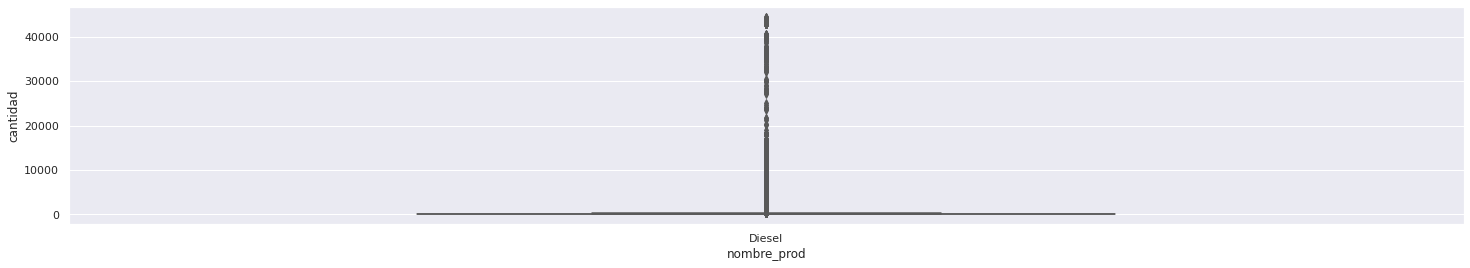

In [104]:
from numpy.lib.function_base import median
sns.set(rc={"figure.figsize":(25, 4)})
box = sns.boxplot(x = 'nombre_prod', y = 'cantidad', data=df_Diesel, width=0.5, fliersize=5,palette="Set2")
box

El gráfico de caja permite inferir que gran parte de los registros se hubica por debajo de los 500 litros:

In [105]:
df_Diesel_menor_500 = df_Diesel[(df_Diesel.cantidad <500)]

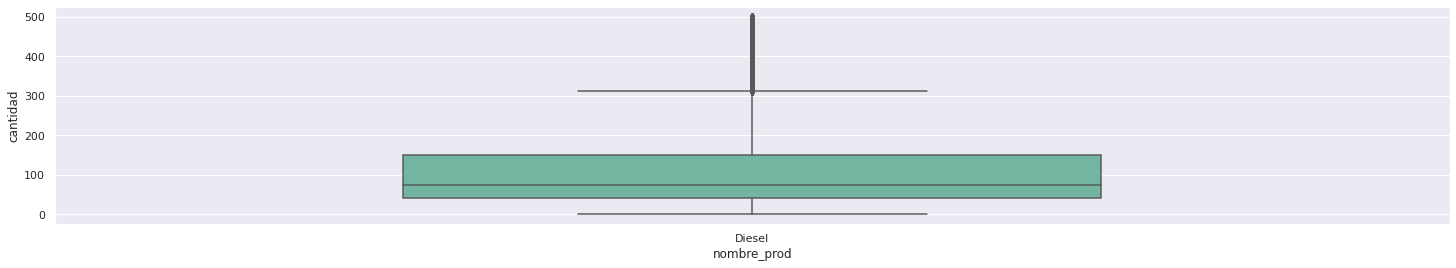

In [106]:
from numpy.lib.function_base import median
sns.set(rc={"figure.figsize":(25, 4)})
box = sns.boxplot(x = 'nombre_prod', y = 'cantidad', data=df_Diesel_menor_500, width=0.5, fliersize=5,palette="Set2")
box

In [107]:
porcentaje_reg_Diesel_menor_xx= len(df_Diesel_menor_500)/len(df_Diesel)
porcentaje_reg_Diesel_menor_xx

0.9225498868082938

In [108]:
df_Diesel_menor_500.cantidad.describe().round()

count   246140.00
mean       117.00
std        110.00
min          0.00
25%         42.00
50%         74.00
75%        150.00
max        500.00
Name: cantidad, dtype: float64

El 92% de los registros son cargas menores a 500 litro con una media de 117 litros por carga.

Vamos a trabajar sobre el mismo producto pero agrupando por industria

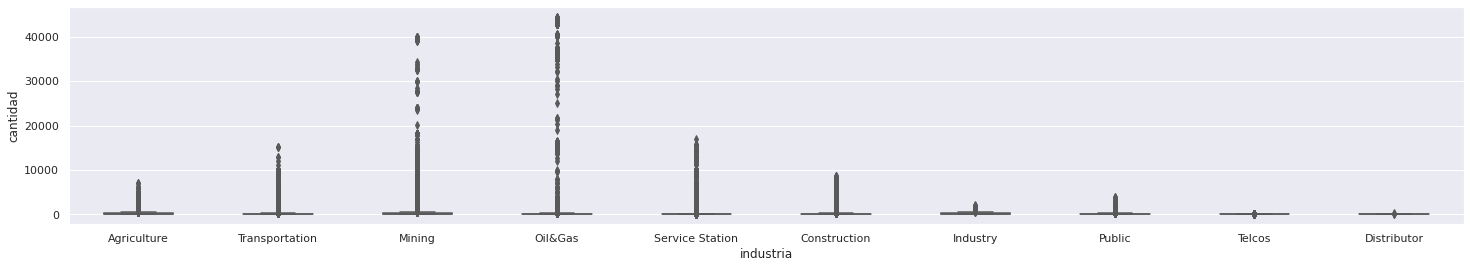

In [109]:
from numpy.lib.function_base import median
sns.set(rc={"figure.figsize":(25, 4)})
box = sns.boxplot(x = 'industria', y = 'cantidad', data=df_Diesel, width=0.5, fliersize=5,palette="Set2")
box

Volvemos a filtrar por valores de consumo menores, esta ves tomando aleatoriamente consumos menores a 700 litros, con la idea de observar mejor las distribuciones:

In [110]:
df_Diesel_menor_700 = df_Diesel[(df_Diesel.cantidad <700)]

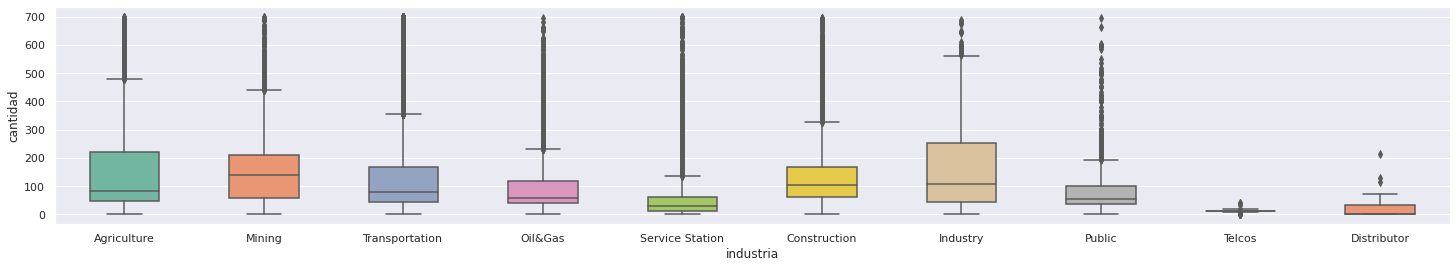

In [111]:
from numpy.lib.function_base import median
sns.set(rc={"figure.figsize":(25, 4)})
box = sns.boxplot(x = 'industria', y = 'cantidad', data=df_Diesel_menor_700, width=0.5, fliersize=5,palette="Set2")
box

Podemos observar que para analizar el consumo  de industrias como minería, agricultura e industria considerar solo consumos menores a 500 litros no sería del todo conveniente debido a que los mismo son muy cercanos a su tercer cuartil

####**>> CONCLUSIONES**

---
Al analizar el consumo de Diesel sin agrupar por industrias podemos concluir que:

1.  Trabajar con valores más allá de los 500 litros por cargas, no sería conveniente dado la gran dispersión de los outliers superiores al límite máximo, que provocarían algún tipo de sesgo en los cálculos del consumo medio.
2.  La media de consumo Diesel sin discriminar por industrias es de 117 litros por carga y parece estar muy influenciada por los valores de consumo altos (media por encima de la mediana).

Si hacemos el mismo análisis pero agrupando el consumo diesel por industria, podemos concluir que:

1. No sería del todo correcto considerar como outliers consumos mayores a 500 litros, para el analisis de la industria de la agricultura, ya que algunos de sus valores del tercer cuartil, son superiores al mismo. Estaríamos cometiendo el error de sesgar el cálculo del consumo medio.

2. Las medias de las industrias es muy diferente: Minería, Construcción e Industria muestran consumos medios mayores a la media total de 117 litros. Mientras que industrias como: estaciones de servicio, telcos y distributor tienen medias menores a 50 litros!
3. Las distribuciones de los datos de la población "Diesel", también muestran diferencias al momento de agruparlas por industria. La media de la población "diesel" está algo influenciada por los valores extremos más altos. Sin embargo, si analizamos la distribución del consumo por industria,  la influencia de valores altos en la media está mucho más asentuada en industrias como "agricultura", "industria", y "transportación".  Por otro lado,  "minería" parece mostrar una distribución más "normalizada" (mediana muy cerca de la media).